In [14]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv

#create imporsonment data url
Imprisonment_baseUrl = "https://api.ed.gov/data/mbk-imprisonment?"
Imprisonment_apiKey = "api_key=DTeVODnGRjLME8jd6PQCOy1DpgLqXPdHWtGO4EqA"
Imprisonment_perPage = "per_page=" + "195"
Imprisonment_url = Imprisonment_baseUrl + Imprisonment_apiKey + "&" + Imprisonment_perPage

#request and get data as "ImprisonmentData" through url
ImprisonmentData = requests.get(Imprisonment_url).json()



In [88]:
Imprisonment_length = len(ImprisonmentData["resources"])

YearList = [] 
RaceEthnicityList = []
SexLists = []
CountList = []
CountPerCapitaList = []

#pull all data from requested data and put into lists for each column
for i in range (Imprisonment_length):
    YearList.append(ImprisonmentData["resources"][i]["Year"])
    RaceEthnicityList.append(ImprisonmentData["resources"][i]["Race/ethnicity"])
    SexLists.append(ImprisonmentData["resources"][i]["Sex"])
    CountList.append(int(ImprisonmentData["resources"][i]["Count"]))
    CountPerCapitaList.append(int(ImprisonmentData["resources"][i]["Rate per 100,000"]))
        #YearList

#create dataframe and input all lists
imprisonmentDf = pd.DataFrame({
    "Year" : YearList,
    "Race/Ethnicity" : RaceEthnicityList,
    "Sex" : SexLists,
    "Count" : CountList,
    "Per Capita Rate per 100,000" : CountPerCapitaList
})

#show imporinment dataframe
imprisonmentDf.sort_values(by=["Year", "Race/Ethnicity"], ascending=True)

        


,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
52,2000,"Black, non-Hispanic",None,104880,2732
104,2000,"Black, non-Hispanic",Male,101521,5358
156,2000,"Black, non-Hispanic",Female,3500,180
65,2000,Hispanic,None,48696,1004
117,2000,Hispanic,Male,46949,1765
169,2000,Hispanic,Female,1596,73
78,2000,"Other race, non-Hispanic",None,15350,826
130,2000,"Other race, non-Hispanic",Male,14504,1557
182,2000,"Other race, non-Hispanic",Female,869,94
39,2000,"White, non-Hispanic",None,59129,345


In [89]:
#initilize race list
raceList = []
#populate race list with unique races
raceList = imprisonmentDf["Race/Ethnicity"].unique()
#show unique races
raceList


array([None, 'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic',
       'Other race, non-Hispanic'], dtype=object)

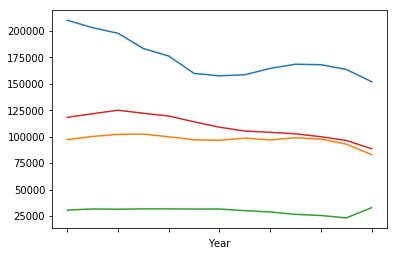

In [127]:
imprisonmentDf_yearSum = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Count"].sum())

#imprisonmentDf_black = imprisonmentDf_yearSum.loc[imprisonmentDf_yearSum["2002"]]
#>>> df.loc[df['shield'] > 6, ['max_speed']]
#imprisonmentDf_yearSum.loc["2001"]
#imprisonmentDf_yearSum.loc[imprisonmentDf_yearSum['Race/Ethnicity'] == "Black, non-Hispanic"]
#imprisonmentDf_yearSum.loc[imprisonmentDf_yearSum["Year"]]
#print(imprisonmentDf_yearSum.loc[imprisonmentDf_yearSum['Race/Ethnicity'].isin(['Black, non-Hispanic'])])
#hosted_in_us = reduced_kickstarter_df.loc[reduced_kickstarter_df["country"] == "US"]

imprisonmentDf_yearSum.unstack(level=-1).plot(kind="line", legend=False)
#df = imprisonmentDf_yearSum.loc[imprisonmentDf_yearSum["Count"] == 209901]
#df
#imprisonmentDf_yearSum


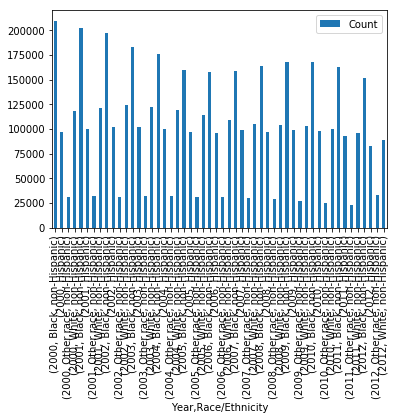

In [96]:
imprisonmentDf_yearSum.plot(kind='bar')